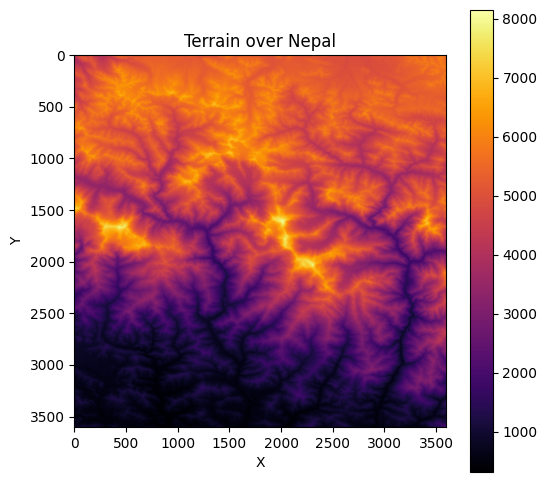

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from functions import FrankeFunction
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import functions2 as fun
from imageio import imread
import warnings
import importlib
from tqdm import trange
warnings.filterwarnings("ignore")

# Load the terrain
terrain1 = imread('/Users/hishem/Documents/GitHub/FYS-STK4155/Project1/Datafiles/nepal_2.tif')
# Show the terrain
plt.figure(figsize=(6,6))
plt.title('Terrain over Nepal')
plt.imshow(terrain1, cmap='inferno')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()
plt.show()

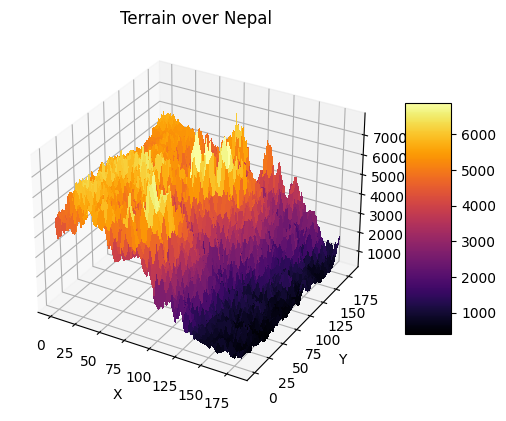

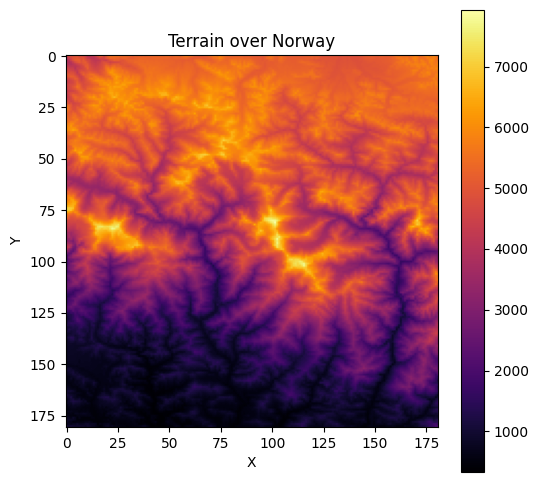

In [58]:
#downsize the terrain
z = terrain1[::20, ::20]

x = np.linspace(0, z.shape[0], int(z.shape[0]))
y = np.linspace(0, z.shape[1], int(z.shape[1]))
xm,ym = np.meshgrid(x,y,indexing='ij')


fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection = '3d')
# # Plot the surface.
surf = ax.plot_surface(xm, ym, z, cmap='inferno',linewidth=0, antialiased=False)
ax.set_zlim(np.min(z), np.max(z))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Terrain over Nepal')
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()
plt.figure(figsize=(6,6))
plt.title('Terrain over Norway')
plt.imshow(z, cmap='inferno')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()
plt.show()

In [59]:
importlib.reload(fun)   
maxdegree = 11


mse_unscaled_test = []
mse_scaled_test = []
r2_unscaled_test= []
r2_scaled_test = []
mse_unscaled_train = []
mse_scaled_train = []
r2_unscaled_train = []
r2_scaled_train = []

betas_unscaled = []
betas_scaled = []


bestmodelOLS = None
bestmseOLS = 1e10


for i in trange(1,maxdegree+1):
    X = fun.create_design_matrix(x,y,i)
    z_flat = z.flatten()

    X_scaled,scaler_X = fun.scale_X(X,minmax=True)
    z_scaled,scaler_z = fun.scale_target(z,minmax=True)

    z_pred, z_model, z_mod_train ,beta, z_test, z_train = fun.OLS(X, z_flat)
    betas_unscaled.append(beta)
    mse , r2 = fun.MSE_R2(z_test, z_pred)
    mse_unscaled_test.append(mse)
    r2_unscaled_test.append(r2)
    mse , r2 = fun.MSE_R2(z_train, z_mod_train)
    mse_unscaled_train.append(mse)
    r2_unscaled_train.append(r2)

    if mse < bestmseOLS:
        bestmseOLS = mse
        bestmodelOLS = z_model

    #scaled
    z_pred, z_model_scaled,z_mod_train ,beta, z_test, z_train = fun.OLS(X_scaled, z_scaled.flatten())
    betas_scaled.append(beta)
    mse , r2 = fun.MSE_R2(z_test, z_pred)
    mse_scaled_test.append(mse)
    r2_scaled_test.append(r2)
    mse , r2 = fun.MSE_R2(z_train, z_mod_train)
    mse_scaled_train.append(mse)
    r2_scaled_train.append(r2)


    if mse < bestmseOLS:
        bestmseOLS = mse
        bestmodelOLS = z_model_scaled

print(bestmodelOLS)
print(z_model_scaled)


100%|██████████| 11/11 [00:03<00:00,  3.61it/s]

[0.67032842 0.69669218 0.71101794 ... 0.21184267 0.19152214 0.15960983]
[0.67032842 0.69669218 0.71101794 ... 0.21184267 0.19152214 0.15960983]


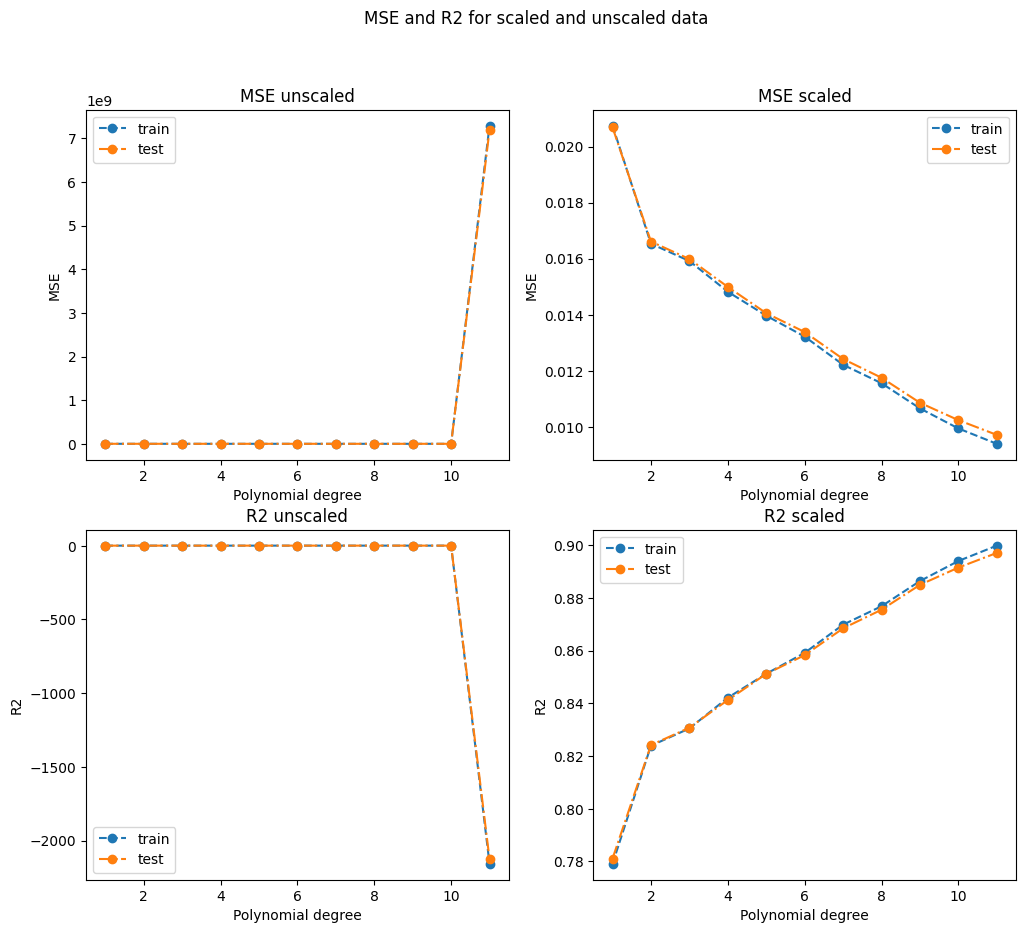

In [60]:
#plotting
# Plot MSE and R2 for scaled and unscaled data

#4 subplots. Scaled and unscaled MSE and R2, for test and train

degrees = range(1, maxdegree+1)


fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('MSE and R2 for scaled and unscaled data')
axs[0, 0].plot(degrees, mse_unscaled_train,'--o', label='train')
axs[0, 0].plot(degrees, mse_unscaled_test,'-.o', label='test')
axs[0, 0].set_title('MSE unscaled')
axs[0, 0].set_xlabel('Polynomial degree')
axs[0, 0].set_ylabel('MSE')
axs[0, 0].legend()
plt.grid()


axs[0, 1].plot(degrees, mse_scaled_train,'--o', label='train')
axs[0, 1].plot(degrees, mse_scaled_test,'-.o', label='test')
axs[0, 1].set_title('MSE scaled')
axs[0, 1].set_xlabel('Polynomial degree')
axs[0, 1].set_ylabel('MSE')
axs[0, 1].legend()
plt.grid()


axs[1, 0].plot(degrees, r2_unscaled_train,'--o', label='train')
axs[1, 0].plot(degrees, r2_unscaled_test,'-.o', label='test')
axs[1, 0].set_title('R2 unscaled')
axs[1, 0].set_xlabel('Polynomial degree')   
axs[1, 0].set_ylabel('R2')
axs[1, 0].legend()
plt.grid()


axs[1, 1].plot(degrees, r2_scaled_train,'--o', label='train')
axs[1, 1].plot(degrees, r2_scaled_test,'-.o', label='test')
axs[1, 1].set_title('R2 scaled')
axs[1, 1].set_xlabel('Polynomial degree')
axs[1, 1].set_ylabel('R2')
axs[1, 1].legend()

plt.grid()

plt.show()

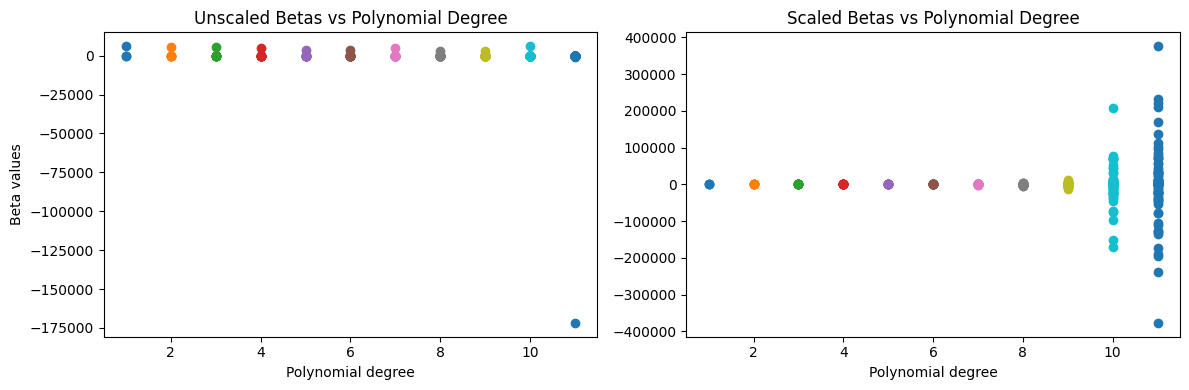

In [61]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))  # Create a 2x1 grid of subplots


# Plot for unscaled betas
for i, betas in enumerate(betas_unscaled):
    axs[0].scatter([degrees[i]] * len(betas), betas, label=f'Degree {degrees[i]}')
axs[0].set_xlabel(r'Polynomial degree')
axs[0].set_ylabel(r'Beta values')
axs[0].set_title('Unscaled Betas vs Polynomial Degree')

# Plot for scaled betas
for i, betas in enumerate(betas_scaled):
    axs[1].scatter([degrees[i]] * len(betas), betas, label=f'Degree {degrees[i]}')
axs[1].set_xlabel(r'Polynomial degree')
axs[1].set_title('Scaled Betas vs Polynomial Degree')

# Adjust layout and display
plt.tight_layout()
plt.show()

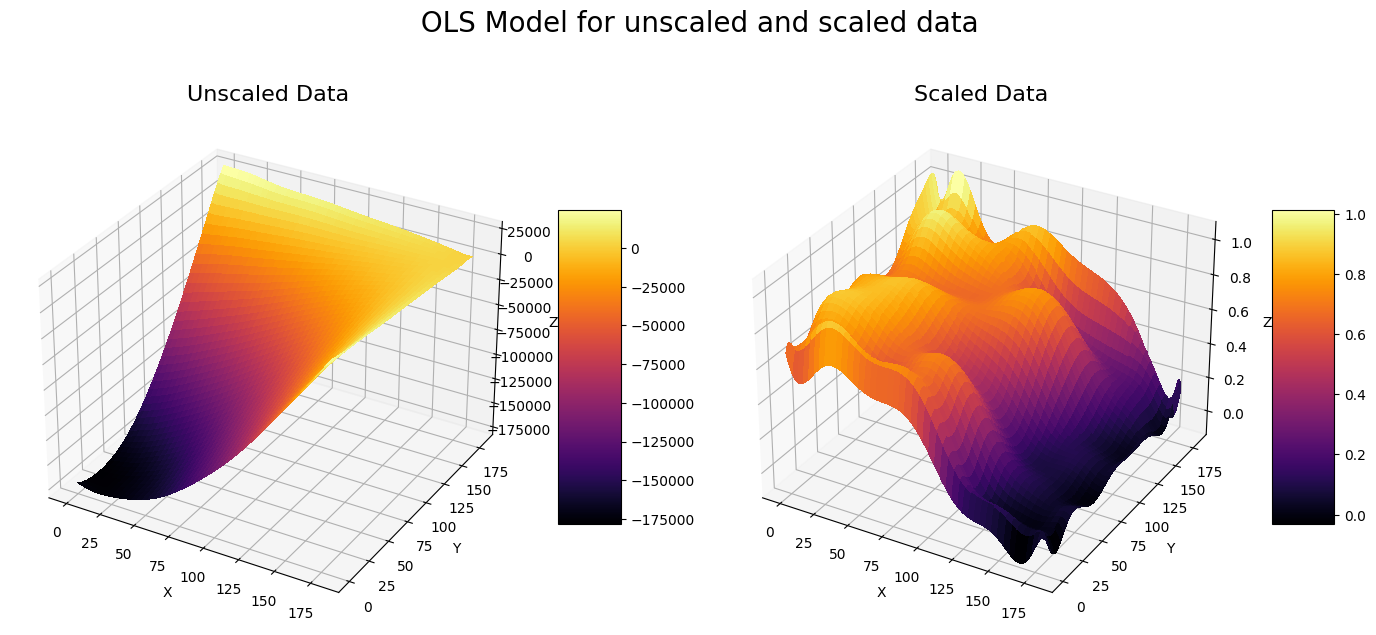

In [62]:
#Plot zmodel for scaled and unscaled data
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(14, 7))

fig.suptitle(' OLS Model for unscaled and scaled data', fontsize=20)  
# Plot unscaled data
ax1.set_zlim(np.min(z_model), np.max(z_model))
surf1 = ax1.plot_surface(xm, ym, z_model.reshape(z.shape), cmap='inferno', linewidth=0, antialiased=False)
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)
ax1.set_title('Unscaled Data', fontsize=16)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')  

# Plot scaled data


# z_model_scaled = scaler_z.inverse_transform(z_model_scaled.reshape(z.shape))
# print(z_model_scaled.shape)
# print(z.shape)
ax2.set_zlim(np.min(z_model_scaled), np.max(z_model_scaled))
surf2 = ax2.plot_surface(xm, ym, z_model_scaled.reshape(z.shape), cmap='inferno', linewidth=0, antialiased=False)
fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=5)
ax2.set_title('Scaled Data', fontsize=16)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')  
plt.tight_layout()
plt.show()

In [63]:
importlib.reload(fun)


nlambdas = 10
lambdas = np.logspace(-5, 1, nlambdas)


degrees = np.arange(1, 20)

mse_sc = np.zeros((nlambdas, len(degrees)+1,2))
mse_un = np.zeros((nlambdas, len(degrees)+1,2))
r2_sc = np.zeros((nlambdas, len(degrees)+1,2))
r2_un = np.zeros((nlambdas, len(degrees)+1,2))

bestmodelRIDGE = None
bestmseRIDGE = 1e10


for i in trange(len(degrees)):
    d = degrees[i]
    for l in range(nlambdas):
        
        X = fun.create_design_matrix(x, y, d)
        z_flat = z.flatten()
        z_scaled,scaler_z = fun.scale_target(z)
        X_scaled,scaler_x = fun.scale_X(X)

        z_pred, z_model, z_mod_train ,beta, z_test, z_train = fun.Ridge(X, z_flat, lambdas[l])
        mseun , r2 = fun.MSE_R2(z_test, z_pred)
        mse_un[l, i, 0] = mseun
        r2_un[l, i, 0] = r2
        mse , r2 = fun.MSE_R2(z_train, z_mod_train)
        mse_un[l, i, 1] = mse
        r2_un[l, i, 1] = r2

        z_pred, z_model_scaled,z_mod_train ,beta, z_test, z_train = fun.Ridge(X_scaled, z_scaled.flatten(), lambdas[l])
        msesc , r2 = fun.MSE_R2(z_test, z_pred)
        mse_sc[l, i, 0] = msesc
        r2_sc[l, i, 0] = r2
        mse , r2 = fun.MSE_R2(z_train, z_mod_train)
        mse_sc[l, i, 1] = mse
        r2_sc[l, i, 1] = r2

        if mseun < bestmseRIDGE:
            bestmseRIDGE = mseun
            bestmodelRIDGE = z_model
        elif msesc < bestmseRIDGE:
            bestmseRIDGE = msesc
            bestmodelRIDGE = z_model_scaled

print(bestmodelRIDGE)

  0%|          | 0/19 [00:00<?, ?it/s]

100%|██████████| 19/19 [01:14<00:00,  3.94s/it]

[ 0.15058686  0.19984184  0.24588877 ... -1.51925996 -1.40297
 -1.25020573]


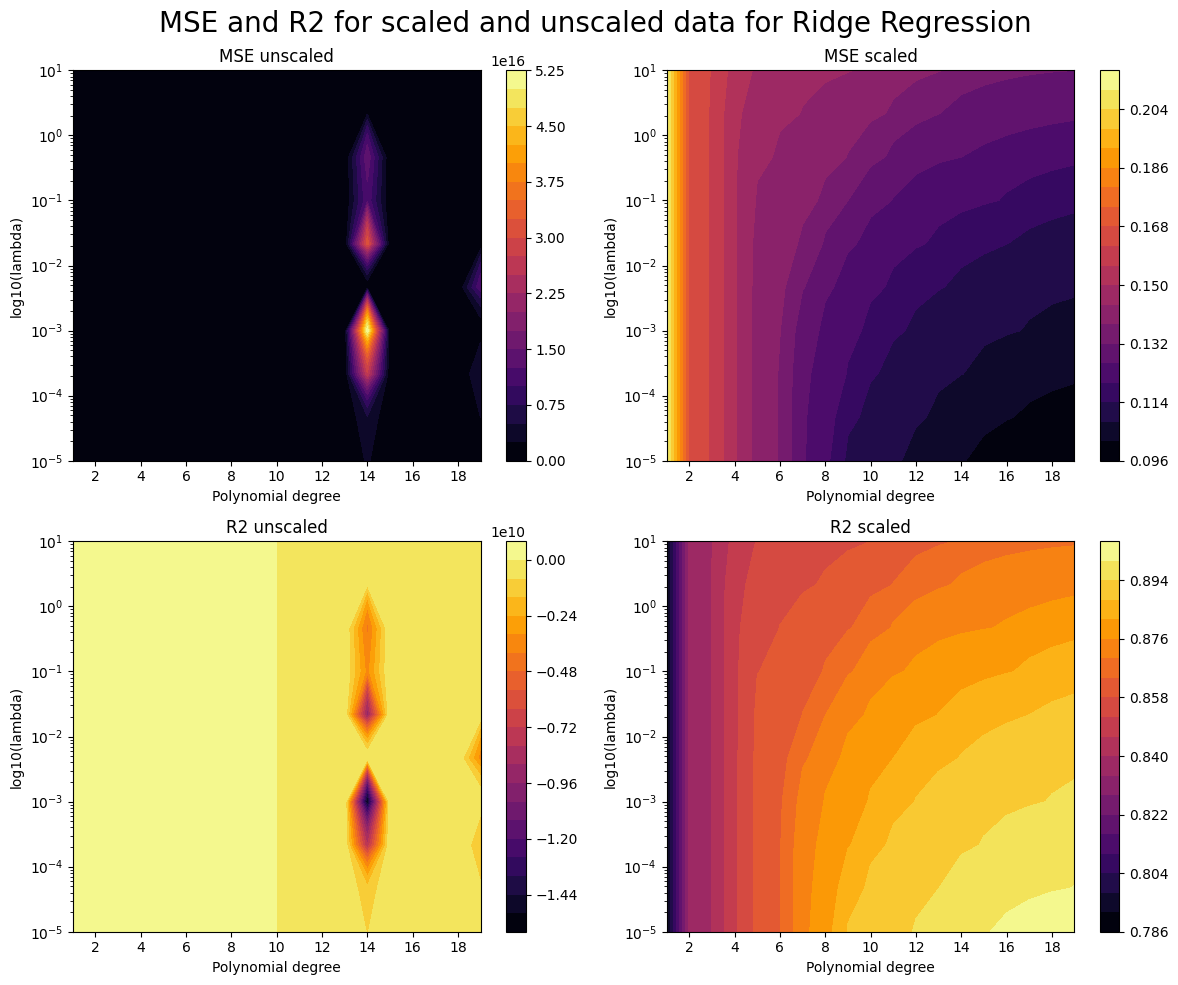

In [64]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('MSE and R2 for scaled and unscaled data for Ridge Regression',fontsize=20)

# Define degrees and lambdas for extent
degrees = np.arange(1, mse_un.shape[1])  # Degree axis (skipping extra index)
lambdas = np.logspace(-5, 1, nlambdas)  # Logarithmic lambda axis

# MSE unscaled
mappable0 = axs[0, 0].contourf(degrees, lambdas, mse_un[:, :-1, 0], cmap='inferno', levels=20)
axs[0, 0].set_title('MSE unscaled')
axs[0, 0].set_xlabel('Polynomial degree')
axs[0, 0].set_ylabel('log10(lambda)')
fig.colorbar(mappable0, ax=axs[0, 0])
axs[0, 0].set_yscale('log')

# MSE scaled
mappable1 = axs[0, 1].contourf(degrees, lambdas, mse_sc[:, :-1, 0], cmap='inferno', levels=20)
axs[0, 1].set_title('MSE scaled')
axs[0, 1].set_xlabel('Polynomial degree')
axs[0, 1].set_ylabel('log10(lambda)')
fig.colorbar(mappable1, ax=axs[0, 1])
axs[0, 1].set_yscale('log')

# R2 unscaled
mappable2 = axs[1, 0].contourf(degrees, lambdas, r2_un[:, :-1, 0], cmap='inferno', levels=20)
axs[1, 0].set_title('R2 unscaled')
axs[1, 0].set_xlabel('Polynomial degree')
axs[1, 0].set_ylabel('log10(lambda)')
fig.colorbar(mappable2, ax=axs[1, 0])
axs[1, 0].set_yscale('log')

# R2 scaled
mappable3 = axs[1, 1].contourf(degrees, lambdas, r2_sc[:, :-1, 0], cmap='inferno', levels=20)
axs[1, 1].set_title('R2 scaled')
axs[1, 1].set_xlabel('Polynomial degree')
axs[1, 1].set_ylabel('log10(lambda)')
fig.colorbar(mappable3, ax=axs[1, 1])
axs[1, 1].set_yscale('log')

plt.tight_layout()
plt.show()


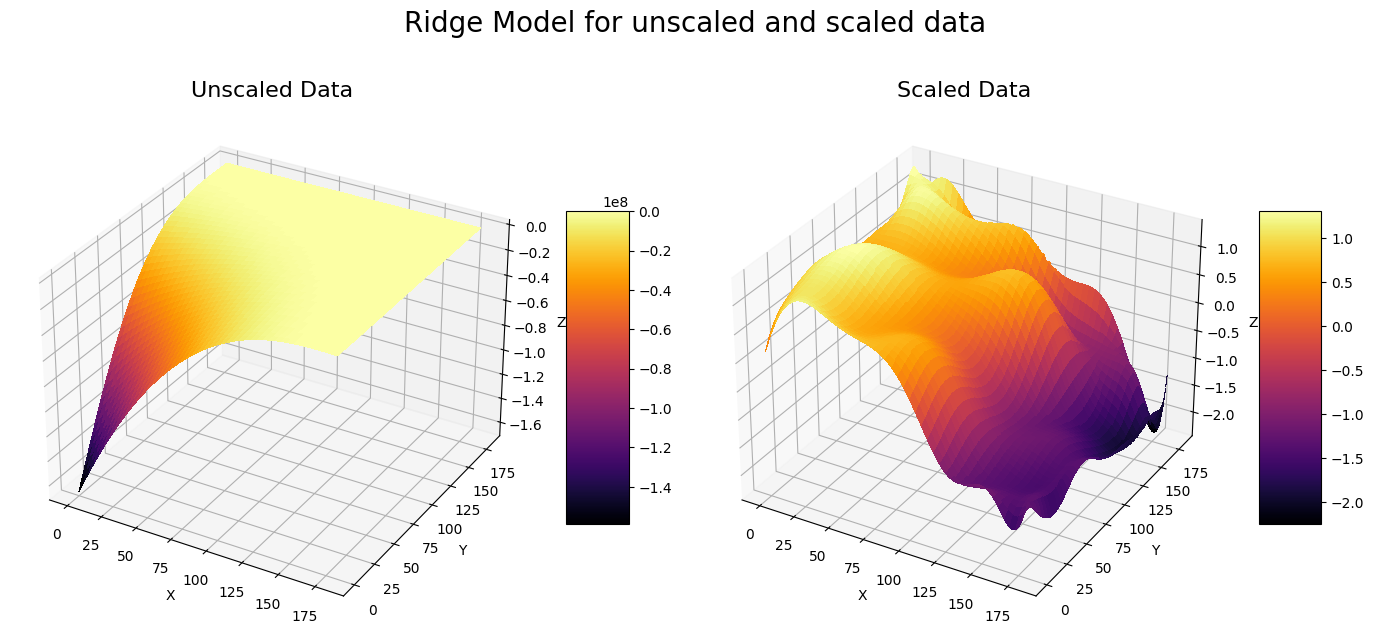

In [65]:
#Plot zmodel for scaled and unscaled data
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(14, 7))

fig.suptitle('Ridge Model for unscaled and scaled data', fontsize=20)  
# Plot unscaled data
ax1.set_zlim(np.min(z_model), np.max(z_model))
surf1 = ax1.plot_surface(xm, ym, z_model.reshape(z.shape), cmap='inferno', linewidth=0, antialiased=False)
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)
ax1.set_title('Unscaled Data', fontsize=16)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')  

# Plot scaled data


ax2.set_zlim(np.min(bestmodelRIDGE), np.max(bestmodelRIDGE))
surf2 = ax2.plot_surface(xm, ym, bestmodelRIDGE.reshape(z.shape), cmap='inferno', linewidth=0, antialiased=False)
fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=5)
ax2.set_title('Scaled Data', fontsize=16)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')  
plt.tight_layout()
plt.show()

In [66]:
importlib.reload(fun)

bestmodelLASSO = None
degrees = np.arange(1, 20)
bestmseLASSO = 1e10

mse_sc_lasso = np.zeros((nlambdas, len(degrees)+1,2))
mse_un_lasso = np.zeros((nlambdas, len(degrees)+1,2))
r2_sc_lasso = np.zeros((nlambdas, len(degrees)+1,2))
r2_un_lasso = np.zeros((nlambdas, len(degrees)+1,2))

for i in trange(1,len(degrees)):
    for l in range(nlambdas):
        X = fun.create_design_matrix(x, y, i)
        z_flat = z.flatten()
        z_scaled, scaler_z = fun.scale_target(z)
        X_scaled, scaler_x = fun.scale_X(X)

        z_pred, z_model, z_mod_train, beta, z_test, z_train = fun.Lasso(X, z_flat, lambdas[l])
        mseun, r2 = fun.MSE_R2(z_test, z_pred)
        mse_un_lasso[l, i, 0] = mseun
        r2_un_lasso[l, i, 0] = r2
        mse, r2 = fun.MSE_R2(z_train, z_mod_train)
        mse_un_lasso[l, i, 1] = mse
        r2_un_lasso[l, i, 1] = r2

        z_pred, z_model_scaled, z_mod_train, beta, z_test, z_train = fun.Lasso(X_scaled, z_scaled.flatten(), lambdas[l])
        msesc, r2 = fun.MSE_R2(z_test, z_pred)
        mse_sc_lasso[l, i, 0] = msesc
        r2_sc_lasso[l, i, 0] = r2
        mse, r2 = fun.MSE_R2(z_train, z_mod_train)
        mse_sc_lasso[l, i, 1] = mse
        r2_sc_lasso[l, i, 1] = r2

        if msesc < bestmseLASSO:
            bestmseLASSO = msesc
            bestmodelLASSO = z_model
        elif mseun < bestmseLASSO:
            bestmseLASSO = mseun
            bestmodelLASSO = z_model_scaled

print(bestmodelLASSO)
print(bestmseLASSO)

100%|██████████| 18/18 [11:25<00:00, 38.10s/it]

[5468.23250933 5463.36414471 5458.61880503 ... 1265.27083776 1301.71003635
 1340.06874252]
0.13730095798295527


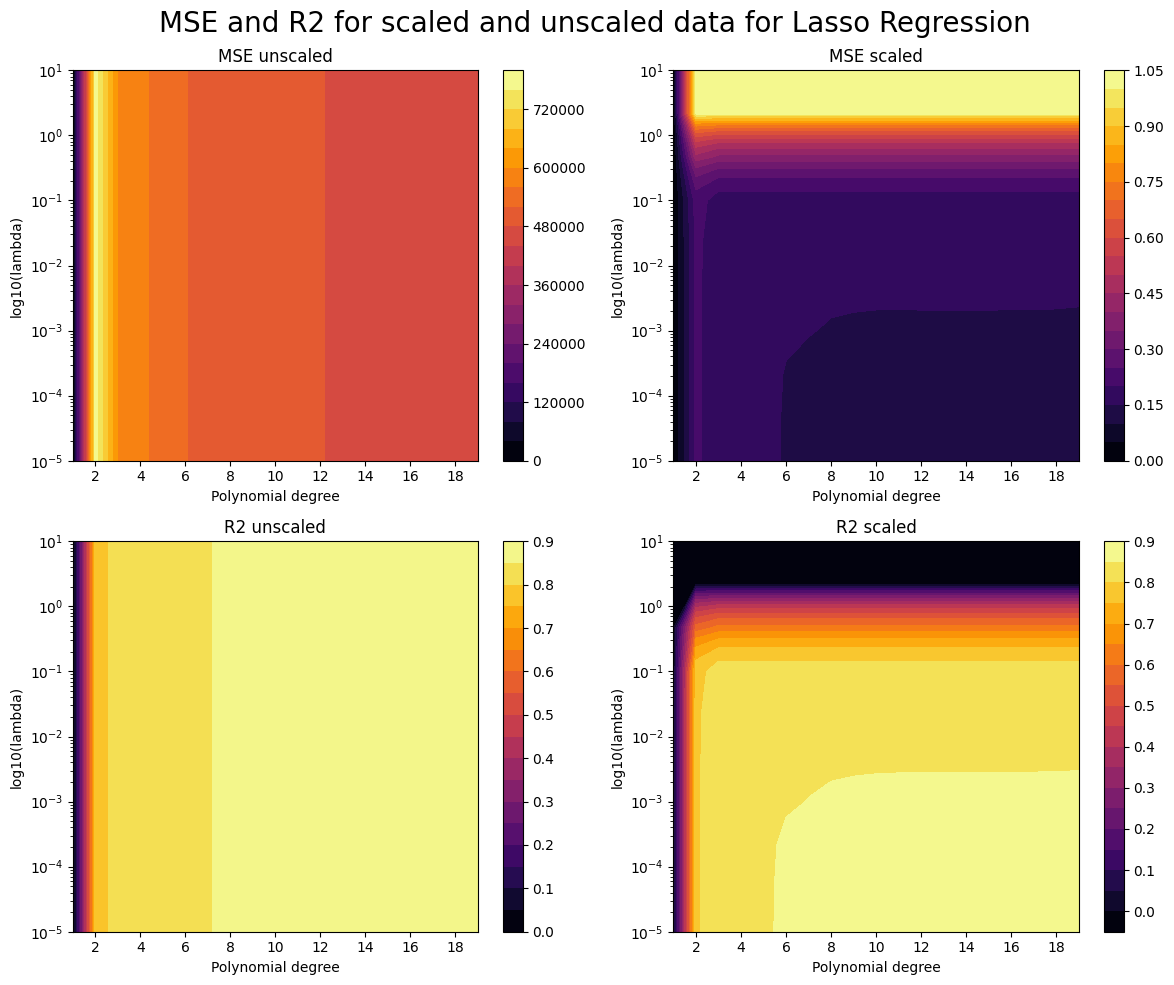

In [67]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('MSE and R2 for scaled and unscaled data for Lasso Regression', fontsize=20)

# Define degrees and lambdas for extent
degrees = np.arange(1, 20) # Degree axis (skipping extra index)
lambdas = np.logspace(-5, 1, nlambdas)  # Logarithmic lambda axis

# MSE unscaled
mappable0 = axs[0, 0].contourf(degrees, lambdas, mse_un_lasso[:, :-1, 0], cmap='inferno', levels=20)
axs[0, 0].set_title('MSE unscaled')
axs[0, 0].set_xlabel('Polynomial degree')
axs[0, 0].set_ylabel('log10(lambda)')
fig.colorbar(mappable0, ax=axs[0, 0])
axs[0, 0].set_yscale('log')

# MSE scaled
mappable1 = axs[0, 1].contourf(degrees, lambdas, mse_sc_lasso[:, :-1, 0], cmap='inferno', levels=20)
axs[0, 1].set_title('MSE scaled')
axs[0, 1].set_xlabel('Polynomial degree')
axs[0, 1].set_ylabel('log10(lambda)')
fig.colorbar(mappable1, ax=axs[0, 1])
axs[0, 1].set_yscale('log')

# R2 unscaled
mappable2 = axs[1, 0].contourf(degrees, lambdas, r2_un_lasso[:, :-1, 0], cmap='inferno', levels=20)
axs[1, 0].set_title('R2 unscaled')
axs[1, 0].set_xlabel('Polynomial degree')
axs[1, 0].set_ylabel('log10(lambda)')
fig.colorbar(mappable2, ax=axs[1, 0])
axs[1, 0].set_yscale('log')

# R2 scaled
mappable3 = axs[1, 1].contourf(degrees, lambdas, r2_sc_lasso[:, :-1, 0], cmap='inferno', levels=20)
axs[1, 1].set_title('R2 scaled')
axs[1, 1].set_xlabel('Polynomial degree')
axs[1, 1].set_ylabel('log10(lambda)')
fig.colorbar(mappable3, ax=axs[1, 1])
axs[1, 1].set_yscale('log')

plt.tight_layout()
plt.show()

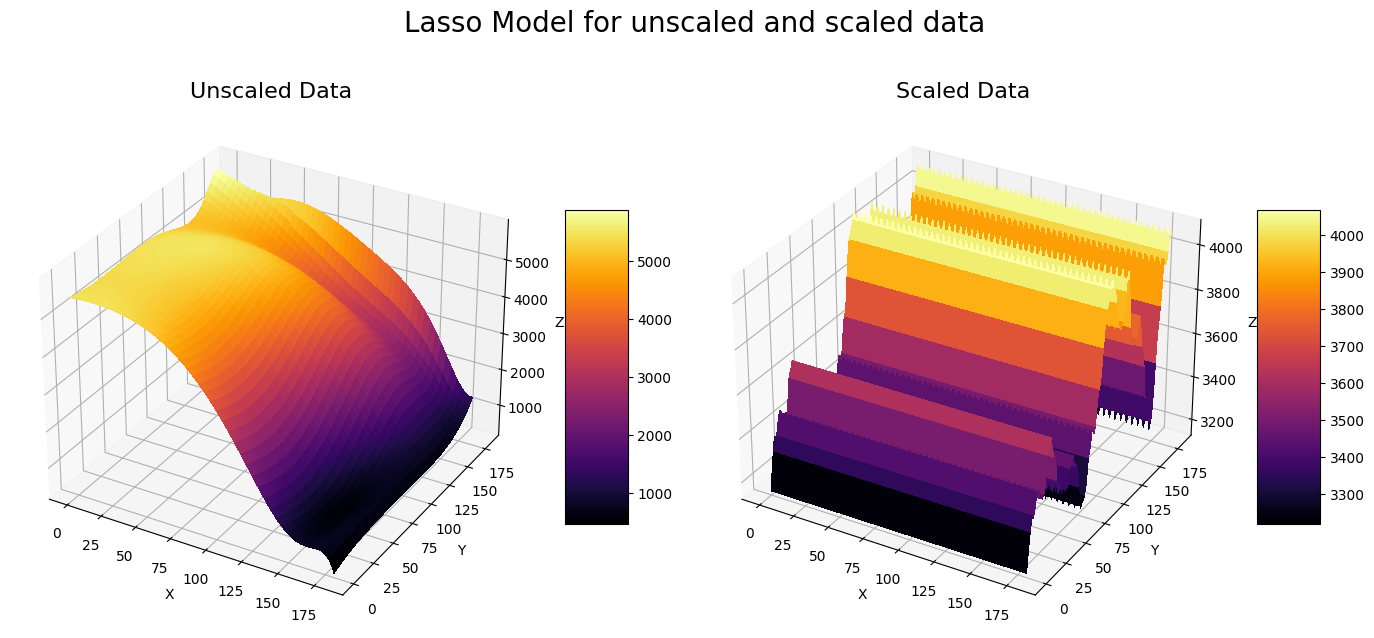

In [68]:
# Plot zmodel for scaled and unscaled data for Lasso model
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(14, 7))

fig.suptitle('Lasso Model for unscaled and scaled data', fontsize=20)  
# Plot unscaled data
ax1.set_zlim(np.min(bestmodelLASSO), np.max(bestmodelLASSO))
surf1 = ax1.plot_surface(xm, ym, bestmodelLASSO.reshape(z.shape), cmap='inferno', linewidth=0, antialiased=False)
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)
ax1.set_title('Unscaled Data', fontsize=16)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')  

# Plot scaled data
z_model_scaled = scaler_z.inverse_transform(z_model_scaled.reshape(z.shape))
ax2.set_zlim(np.min(z_model_scaled), np.max(z_model_scaled))
surf2 = ax2.plot_surface(xm, ym, z_model_scaled.reshape(z.shape), cmap='inferno', linewidth=0, antialiased=False)
fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=5)
ax2.set_title('Scaled Data', fontsize=16)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')  

plt.tight_layout()
plt.show()

100%|██████████| 9/9 [00:20<00:00,  2.32s/it]


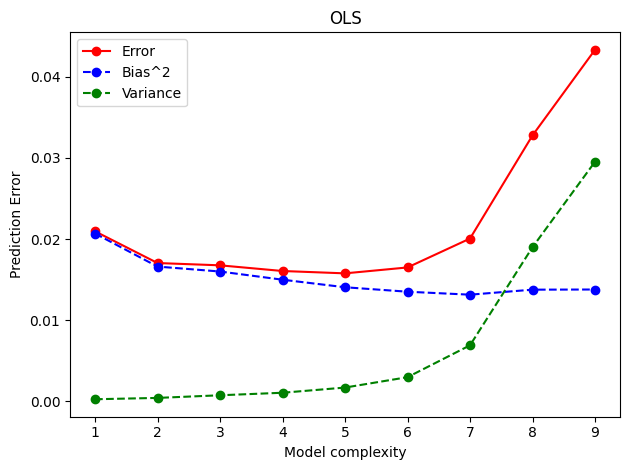

Degree of lowest error: 4
Lowest error: 0.01577961109544687
[0.67032842 0.69669218 0.71101794 ... 0.21184267 0.19152214 0.15960983]


In [73]:
importlib.reload(fun)
from tqdm import trange
from sklearn.utils import resample

n_boostraps = 200
maxdegree = 10
batch_size = 200


polydegree = np.zeros(maxdegree)
error = np.zeros_like(polydegree)
bias = np.zeros_like(polydegree)
variance = np.zeros_like(polydegree)
models = []

for degree in trange(1, maxdegree):
    X = fun.create_design_matrix(x, y, degree)

    X_scaled,scaler_X = fun.scale_X(X,minmax=True)
    z_scaled,scaler_z = fun.scale_target(z,minmax=True)


    polydegree[degree] = degree

    error[degree], bias[degree], variance[degree], zmod = fun.bootstrap(X_scaled, z_scaled.flatten(), n_boostraps,batch_size)
    models.append(zmod)

plt.plot(polydegree[1:],error[1:], '-o',label='Error',color='red')
plt.plot(polydegree[1:], bias[1:],'--o', label='Bias^2',color='blue')
plt.plot(polydegree[1:], variance[1:],'--o', label='Variance',color='green')
plt.title('Bias-variance tradeoff')
plt.title('OLS')
plt.xlabel('Model complexity')
plt.ylabel('Prediction Error')
plt.legend()
plt.tight_layout()
plt.show()

#print degree of lowest error   
print('Degree of lowest error:',np.argmin(error[1:]))
print('Lowest error:',np.min(error[1:]))

if np.argmin(error[1:]) < bestmseOLS:
    bestmseOLS = np.min(error[1:])
    bestmodelOLS = models[np.argmin(error[1:])]

print(bestmodelOLS)

In [70]:

importlib.reload(fun)




k = np.arange(7, 11)

degrees = np.arange(5, 15)

mse = np.zeros((len(k), len(degrees), 3))

best_mse_ols, best_mse_ridge, best_mse_lasso = np.inf, np.inf, np.inf
best_k_ols, best_degree_ols = None, None
best_k_ridge, best_degree_ridge = None, None
best_k_lasso, best_degree_lasso = None, None

bestmodelols, bestmodelridge, bestmodellasso = bestmodelOLS, bestmodelRIDGE, bestmodelLASSO

print(bestmodelLASSO,bestmseLASSO)
print(bestmodelRIDGE,bestmseRIDGE)
print(bestmodelOLS,bestmseOLS)

n,m = 0,0
for d in degrees:
    n = 0
    for i in k:
        X = fun.create_design_matrix(x, y, d)
        X_scaled,scaler_X = fun.scale_X(X,minmax=True)
        z_scaled,scaler_z = fun.scale_target(z,minmax=True)
        errorols,betaols = fun.k_fold_CV('OLS', X_scaled, z_scaled.flatten(), 0, i)
       
        errorridge,betaridge = fun.k_fold_CV('Ridge', X_scaled, z_scaled.flatten(),1e-4,i)

        errorlasso,betalasso = fun.k_fold_CV('Lasso', X_scaled, z_scaled.flatten(),1e-5,i)

        mse[n, m, 0] = errorols
        mse[n, m, 1] = errorridge
        mse[n, m, 2] = errorlasso

        if errorols < bestmseOLS:
            print('OLS updated')
            print(errorols)
            print(betaols)
            bestmodelols = X @ betaols
            bestmseOLS = errorols
            best_k_ols = i
            best_degree_ols = d

        # Update best values for Ridge
        if errorridge < bestmseRIDGE:
            print('Ridge updated')
            bestmodelridge = X @ betaridge
            bestmseRIDGE = errorridge
            best_k_ridge = i
            best_degree_ridge = d

        # Update best values for Lasso
        if errorlasso < bestmseLASSO:
            print('Lasso updated')
            bestmodellasso = X @ betalasso
            bestmseLASSO = errorlasso
            best_k_lasso = i
            best_degree_lasso = d

        print(n,m)
        n+=1
    m += 1

# Print the best results
print(f"Best OLS: MSE = {best_mse_ols}, k = {best_k_ols}, degree = {best_degree_ols}")
print(f"Best Ridge: MSE = {best_mse_ridge}, k = {best_k_ridge}, degree = {best_degree_ridge}")
print(f"Best Lasso: MSE = {best_mse_lasso}, k = {best_k_lasso}, degree = {best_degree_lasso}")

# 
print(bestmodelOLS,bestmseOLS)
print(bestmodelRIDGE,bestmseRIDGE)
print(bestmodelLASSO,bestmseLASSO)

print(bestmodelols,bestmodelridge,bestmodellasso)


[5468.23250933 5463.36414471 5458.61880503 ... 1265.27083776 1301.71003635
 1340.06874252] 0.13730095798295527
[ 0.15058686  0.19984184  0.24588877 ... -1.51925996 -1.40297
 -1.25020573] 0.09920487794756724
[0.67032842 0.69669218 0.71101794 ... 0.21184267 0.19152214 0.15960983] 0.009401956018248128
Ridge updated
Lasso updated
0 0
Ridge updated
Lasso updated
1 0
Ridge updated
Lasso updated
2 0
Ridge updated
Lasso updated
3 0
0 1
Lasso updated
1 1
Lasso updated
2 1
3 1
0 2
1 2
2 2
Ridge updated
3 2
0 3
1 3
Ridge updated
2 3
Ridge updated
3 3
0 4
1 4
Ridge updated
2 4
3 4
0 5
1 5
2 5
3 5
0 6
1 6
2 6
3 6
0 7
1 7
2 7
3 7
0 8
1 8
2 8
3 8
0 9
1 9
2 9
3 9
Best OLS: MSE = inf, k = None, degree = None
Best Ridge: MSE = inf, k = 9, degree = 9
Best Lasso: MSE = inf, k = 9, degree = 6
[0.67032842 0.69669218 0.71101794 ... 0.21184267 0.19152214 0.15960983] 0.009401956018248128
[ 0.15058686  0.19984184  0.24588877 ... -1.51925996 -1.40297
 -1.25020573] 0.017872705504663283
[5468.23250933 5463.3641447

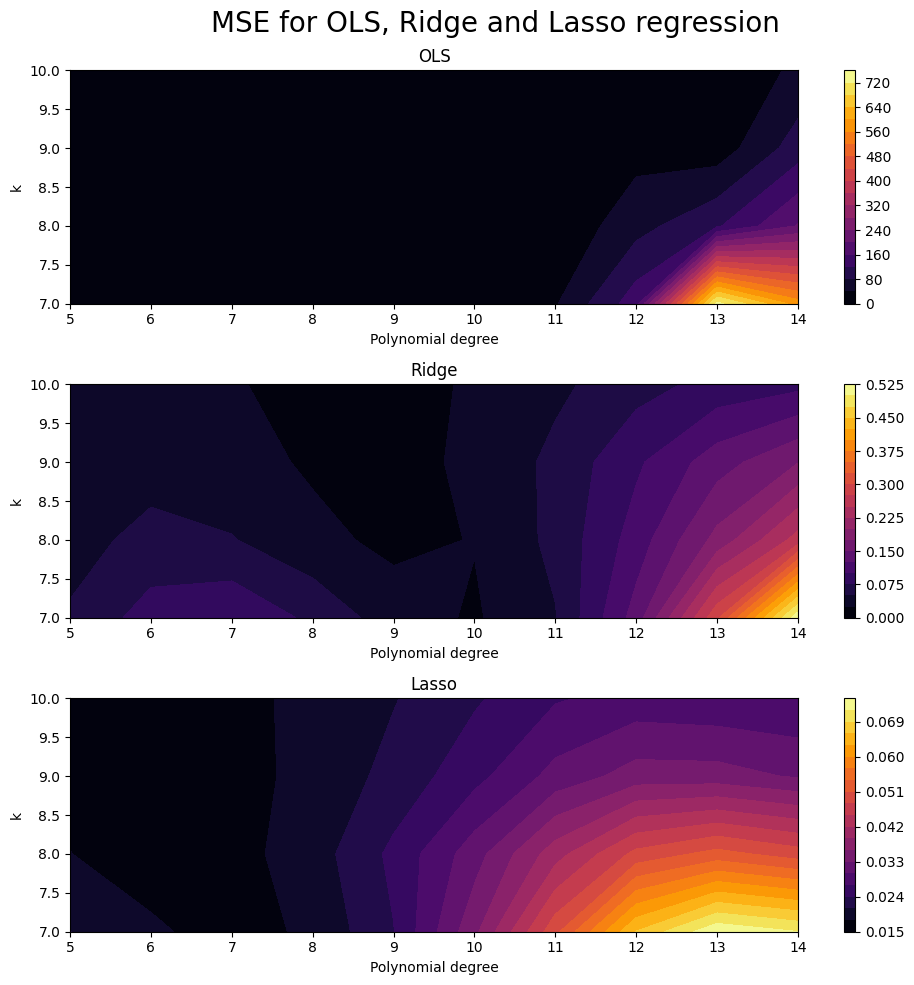

In [74]:
#Heatmap plot for MSE for OLS, Ridge and Lasso regression
fig, axs = plt.subplots(3, 1, figsize=(10, 10))
fig.suptitle('MSE for OLS, Ridge and Lasso regression',fontsize=20)


k = np.arange(7, 11)

degrees = np.arange(5, 15)

# OLS
mappable0 = axs[0].contourf(degrees, k, mse[:, :, 0], cmap='inferno', levels=20)
axs[0].set_title('OLS')
axs[0].set_xlabel('Polynomial degree')
axs[0].set_ylabel('k')
fig.colorbar(mappable0, ax=axs[0])

# Ridge
mappable1 = axs[1].contourf(degrees, k, mse[:, :, 1], cmap='inferno', levels=20)
axs[1].set_title('Ridge')
axs[1].set_xlabel('Polynomial degree')
axs[1].set_ylabel('k')
fig.colorbar(mappable1, ax=axs[1])

# Lasso
mappable2 = axs[2].contourf(degrees, k, mse[:, :, 2], cmap='inferno', levels=20)
axs[2].set_title('Lasso')
axs[2].set_xlabel('Polynomial degree')
axs[2].set_ylabel('k')
fig.colorbar(mappable2, ax=axs[2])

plt.tight_layout()
plt.show()




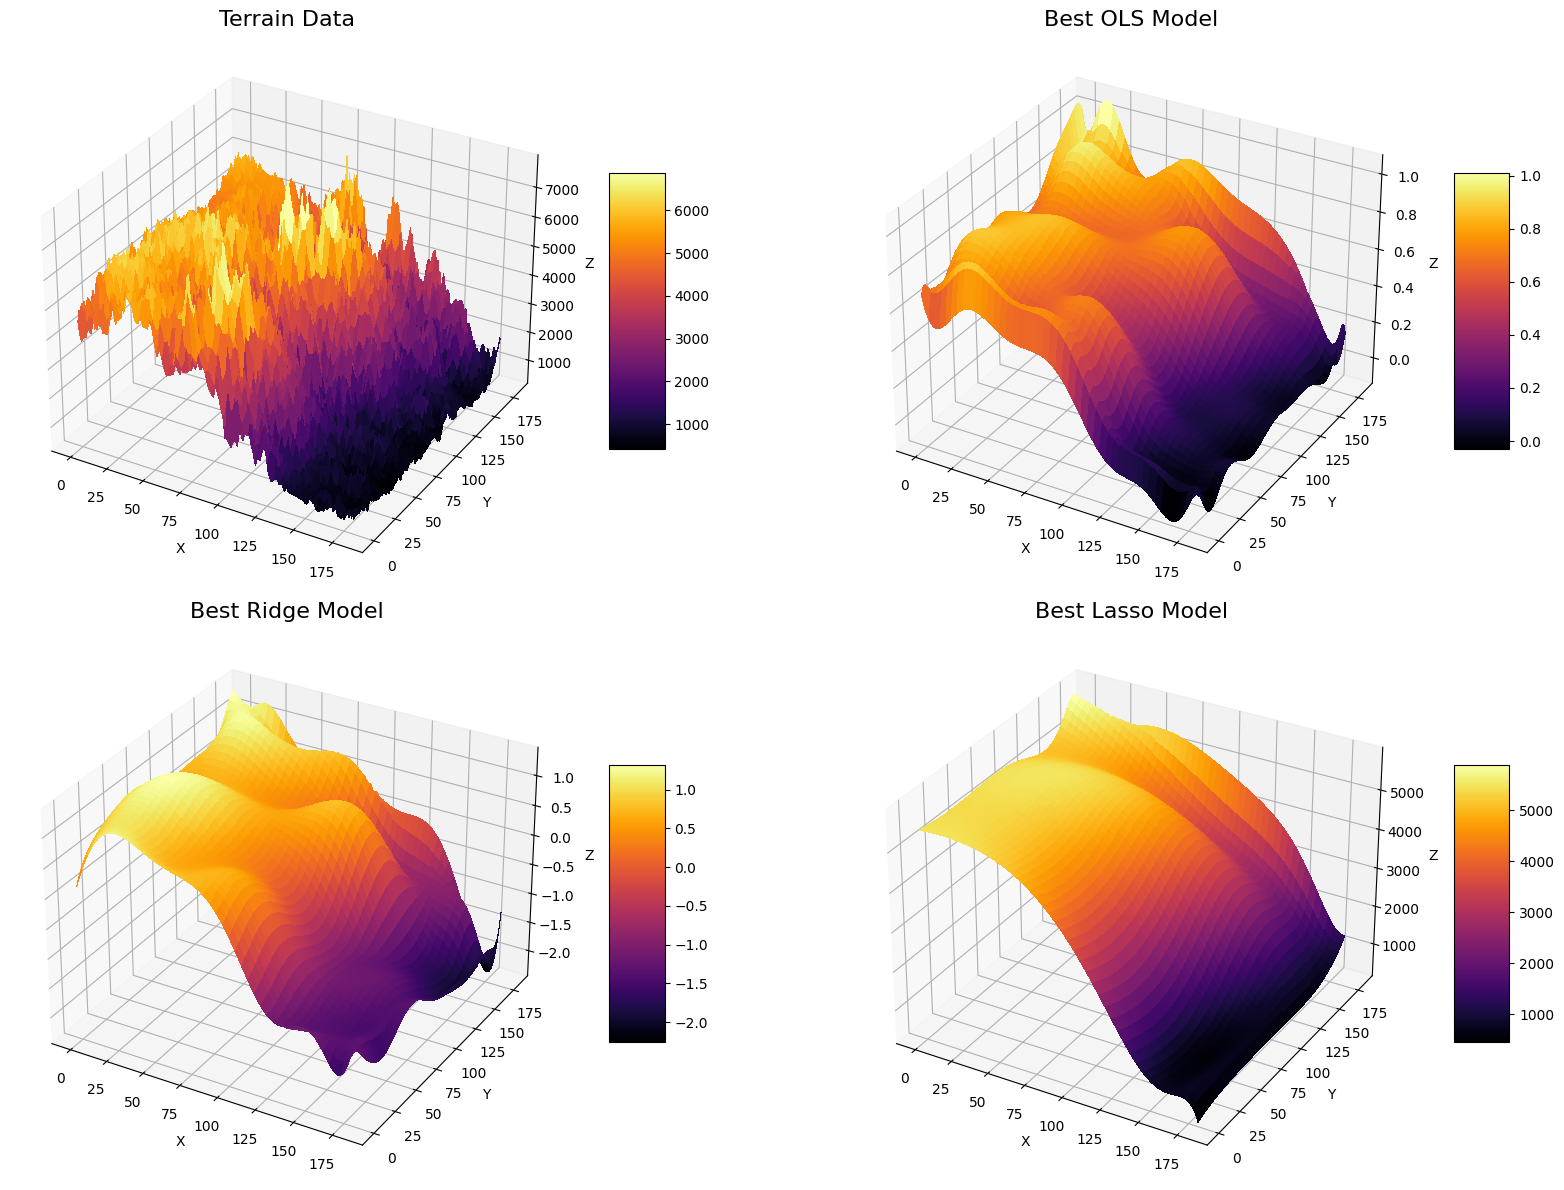

In [75]:
# Surface plot for all the best models as well as the terrain data


fig = plt.figure(figsize=(18, 12))

# Plot terrain data
ax1 = fig.add_subplot(221, projection='3d')
ax1.set_zlim(np.min(z), np.max(z))
surf1 = ax1.plot_surface(xm, ym, z, cmap='inferno', linewidth=0, antialiased=False)
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)
ax1.set_title('Terrain Data', fontsize=16)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# Plot best OLS model
ax2 = fig.add_subplot(222, projection='3d')
ax2.set_zlim(np.min(bestmodelOLS), np.max(bestmodelOLS))
surf2 = ax2.plot_surface(xm, ym, bestmodelOLS.reshape(z.shape), cmap='inferno', linewidth=0, antialiased=False)
fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=5)
ax2.set_title('Best OLS Model', fontsize=16)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

# Plot best Ridge model
ax3 = fig.add_subplot(223, projection='3d')
ax3.set_zlim(np.min(bestmodelRIDGE), np.max(bestmodelRIDGE))
surf3 = ax3.plot_surface(xm, ym, bestmodelRIDGE.reshape(z.shape), cmap='inferno', linewidth=0, antialiased=False)
fig.colorbar(surf3, ax=ax3, shrink=0.5, aspect=5)
ax3.set_title('Best Ridge Model', fontsize=16)
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')

# Plot best Lasso model
ax4 = fig.add_subplot(224, projection='3d')
ax4.set_zlim(np.min(bestmodelLASSO), np.max(bestmodelLASSO))
surf4 = ax4.plot_surface(xm, ym, bestmodelLASSO.reshape(z.shape), cmap='inferno', linewidth=0, antialiased=False)
fig.colorbar(surf4, ax=ax4, shrink=0.5, aspect=5)
ax4.set_title('Best Lasso Model', fontsize=16)
ax4.set_xlabel('X')
ax4.set_ylabel('Y')
ax4.set_zlabel('Z')

plt.tight_layout()
plt.show()